### Сидоров Никита, БПМ161
# ЛАБОРАТОРНАЯ РАБОТА 5.
## ПРИБЛИЖЕНИЕ ФУНКЦИЙ

### Задание 1 (5.1.23)

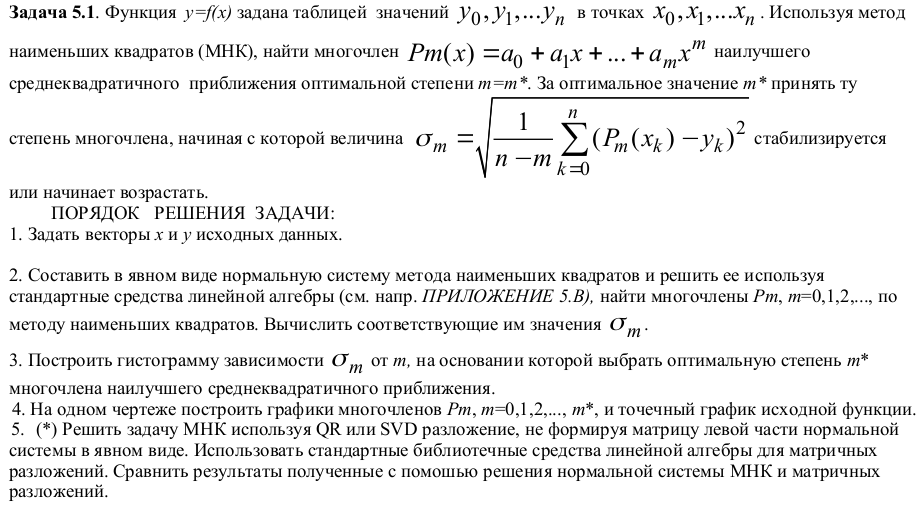

In [87]:
from IPython.display import Image
Image("/home/nikita/Изображения/5_task1.png")

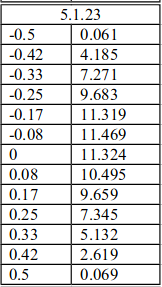

In [88]:
Image("/home/nikita/Изображения/5_task1_2.png")

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy.linalg import solve_triangular

Зададим векторы исходных данных.

In [90]:
X=np.array([-0.5,-0.42,-0.33,-0.25,-0.17,-0.08,0,0.08,0.17,0.25,0.33,0.42,0.5])
Y=np.array([0.061,4.185,7.271,9.683,11.319,11.469,11.324,10.495,9.659,7.345,5.132,2.619,0.069])

In [91]:
def mnk(X,Y,m):
    """Находит коэффициенты разложения функции по базисным векторам x^j методом наименьших квадратов.
    Использует систему нормальных уравнений в явном виде.
    X, Y - векторы исходных данных
    m - степень многочлена
    
    Возвращает вектор коэффициентов."""
    A=np.array([[x**j for j in range(m+1)] for x in X])
    return np.linalg.solve(A.T@A,A.T@Y)

def polynom(x,koefs):
    """Возвращает значение полинома koefs[0]*x^0 +  koefs[1]*x^1 + ... + koefs[N]*x^N в точке х."""
    
    return np.sum(koefs*(x**np.arange(koefs.shape[0])))

Построим гистограмму зависимости $\sigma_m$ от $m$.

In [92]:
sigmas=[]
for m in range(10):
    koefs=mnk(X,Y,m)
    Y_pred=np.array([polynom(x,koefs) for x in X])
    sigma=np.sqrt(np.sum((Y_pred-Y)**2)/(Y.shape[0]-m))
    sigmas.append(sigma)

Text(0, 0.5, '$\\sigma$')

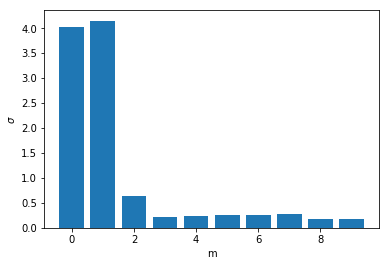

In [93]:
plt.bar(np.arange(10),sigmas)
plt.xlabel('m')
plt.ylabel('$\sigma$')

Из гистограммы видно, что $\sigma$ стабилизируется и перестаёт уменьшаться начиная с $m=3$.

На одном чертеже построить графики многочленов $P_m, m=0,1,2,..., m^*$, и точечный график исходной функции.

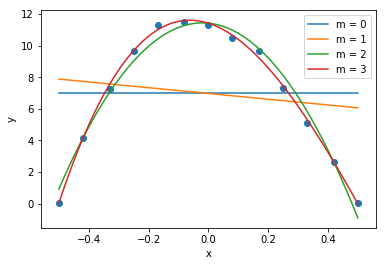

In [94]:
m_star=3
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
X_test=np.linspace(-0.5,0.5,100)
for m in range(m_star+1):
    koefs=mnk(X,Y,m)
    Y_pred=np.array([polynom(x,koefs) for x in X_test])
    plt.plot(X_test,Y_pred,label='m = '+str(m))
plt.legend()

Решим задачу МНК, используя QR разложение.

In [95]:
def mnk_QR(X,Y,m):
    """Находит коэффициенты разложения функции по базисным векторам x^j, используя QR-разложение.
    X, Y - векторы исходных данных
    m - степень многочлена
    
    Возвращает вектор коэффициентов."""
    A=np.array([[x**j for j in range(m+1)] for x in X])
    Q,R=qr(A)
    y_rot=Q.T@Y

    return solve_triangular(R[:m+1],y_rot[:m+1],lower=False)

In [96]:
sigmas=[]
for m in range(10):
    koefs=mnk_QR(X,Y,m)
    Y_pred=np.array([polynom(x,koefs) for x in X])
    sigma=np.sqrt(np.sum((Y_pred-Y)**2)/(Y.shape[0]-m))
    sigmas.append(sigma)

Text(0, 0.5, '$\\sigma$')

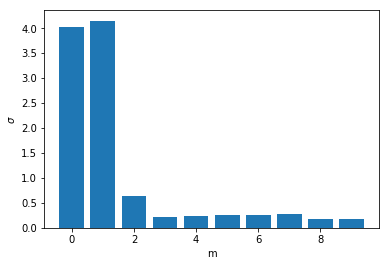

In [97]:
plt.bar(np.arange(10),sigmas)
plt.xlabel('m')
plt.ylabel('$\sigma$')

Результаты такие же, как и в предыдущем случае. За $m^{*}$ снова возьмём 3.

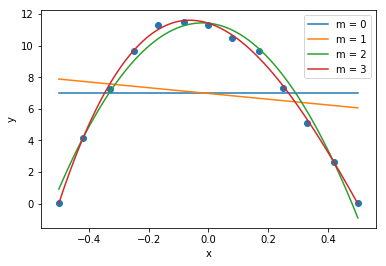

In [98]:
m_star=3
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
X_test=np.linspace(-0.5,0.5,100)
for m in range(m_star+1):
    koefs=mnk_QR(X,Y,m)
    Y_pred=np.array([polynom(x,koefs) for x in X_test])
    plt.plot(X_test,Y_pred,label='m = '+str(m))
plt.legend()

### Задание 2 (5.5.4)

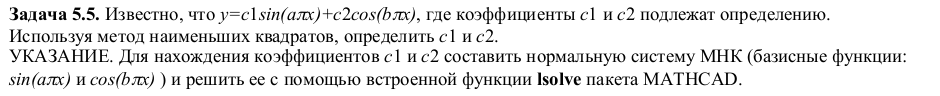

In [99]:
Image("/home/nikita/Изображения/5_task2.png")

In [100]:
Image("/home/nikita/Изображения/5_task2_2.png")

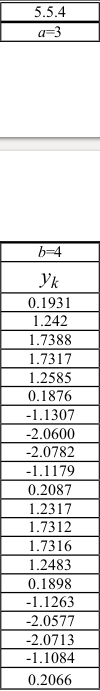

In [101]:
Image("/home/nikita/Изображения/5_task2_3.png")

In [102]:
def phi_1(x):
    a=3
    return np.sin(a*np.pi*x)

def phi_2(x):
    b=4
    return np.cos(b*np.pi*x)

def MNK(x,y,phi_s):
    """Находит коэффициенты разложения функции по произвольным базисным функциям.
    Использует систему нормальных уравнений в явном виде.
    x, y - векторы исходных данных
    phi_s - список из базисных функций
    
    Возвращает вектор коэффициентов."""
    
    A=phi_s[0](x)[:,None]
    for phi in phi_s[1:]:
        A=np.hstack((A,phi(x)[:,None]))
    
    return np.linalg.solve(A.T@A,A.T@y)

In [103]:
X=np.array([-1+0.1*k for k in range(0,21)])
Y=np.array([0.1931,1.242,1.7388,1.7317,1.2585,0.1876,-1.1307,-2.0600,-2.0782,-1.1179,0.2087,1.2317,1.7312,1.7316,1.2483,0.1898,-1.1263,-2.0577,-2.0713,-1.1084,0.2066])

In [104]:
c=MNK(X,Y,[phi_1,phi_2])
print('Коэффициенты:',c)

Коэффициенты: [5.76038694e-05 2.01690093e-01]


### Задание 3 (5.6.12)

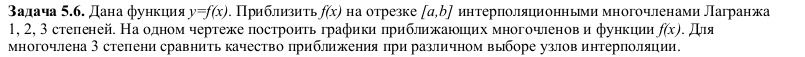

In [106]:
Image("/home/nikita/Изображения/5_task3.png")

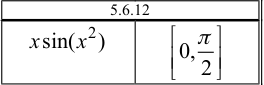

In [107]:
Image("/home/nikita/Изображения/5_task3_2.png")

In [17]:
def f(x):
    return x*np.sin(x**2)
a=0
b=np.pi/2

In [18]:
def l_k(k,x,X):
    res=1
    for j in range(X.shape[0]):
        if j!= k:
            res*=(x-X[j])/(X[k]-X[j])
    return res

def lagr_pol(x,X,Y):
    """Возвращает значение полинома Лагранжа в точке х.
    X,Y - векторы начальных значений."""
    
    res=0
    for k in range(X.shape[0]):
        res+=Y[k]*l_k(k,x,X)
    return res

Построим графики приближающих многочленов Лагранжа для степеней 1, 2 и 3.

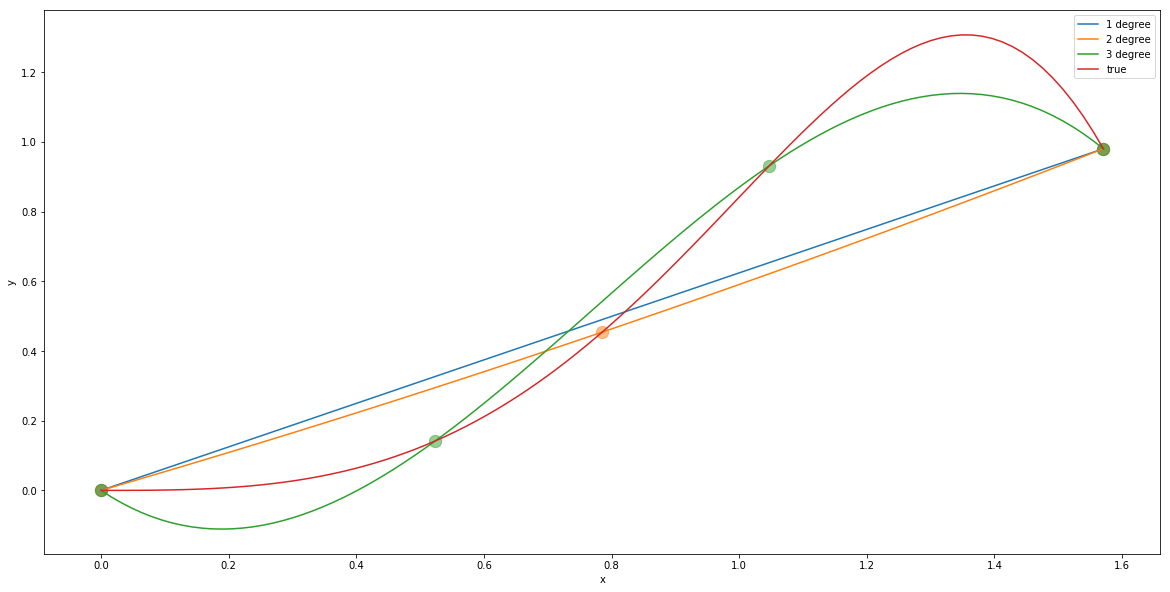

In [19]:
plt.figure(figsize=(20,10))
x_s=np.linspace(a,b,100)
y_s=f(x_s)
plt.xlabel('x')
plt.ylabel('y')
for m in range(1,4):
    X=np.linspace(a,b,m+1)
    Y=f(X)
    plt.scatter(X,Y,alpha=0.5,s=150)
    plt.plot(x_s,[lagr_pol(x,X,Y) for x in x_s],label=str(m)+' degree')
plt.plot(x_s,y_s,label='true')
plt.legend()

Для многочлена 3-й степени сравним качество приближения при различном выборе узлов интерполяции.

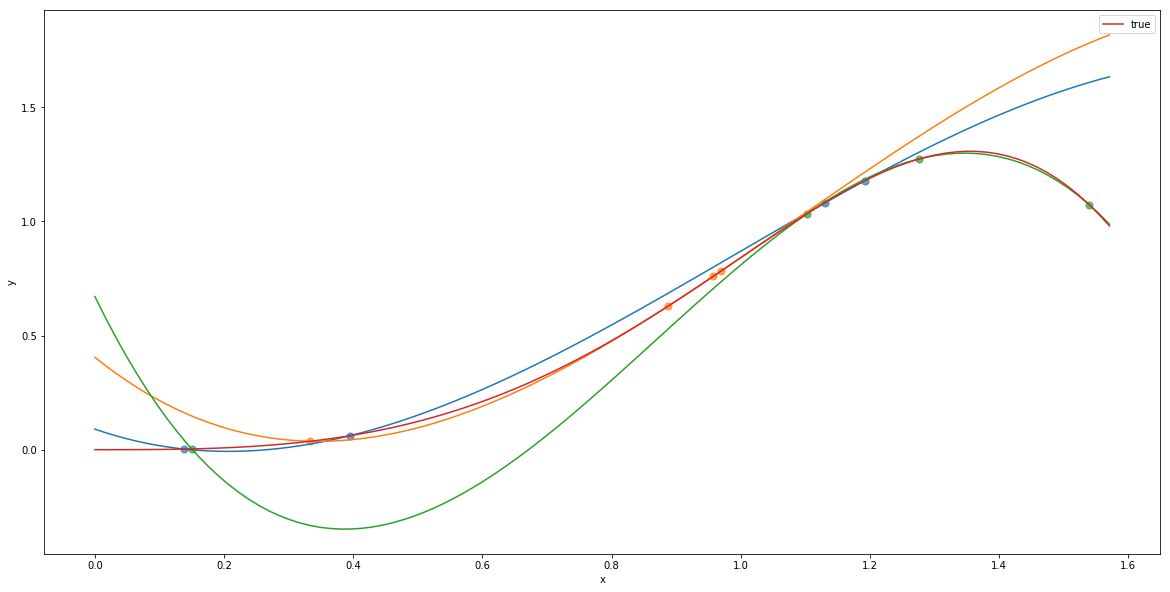

In [20]:
plt.figure(figsize=(20,10))
x_s=np.linspace(a,b,100)
y_s=f(x_s)
plt.xlabel('x')
plt.ylabel('y')
for _ in range(3):
    X=a+np.random.random(4)*(b-a)
    Y=f(X)
    plt.scatter(X,Y,alpha=0.7,s=50)
    plt.plot(x_s,[lagr_pol(x,X,Y) for x in x_s])
plt.plot(x_s,y_s,label='true')
plt.legend()

Как видно из графиков, в зависимости от того, где расположились узлы интерполяции, многочлены приближают функцию в одних местах лучше, а в других хуже. Так, на первом участке функция лучше всего приближается "синим" многочленом, далее - "оранжевым" и в конце - "зелёным".

### Задание 4 (5.8.3)

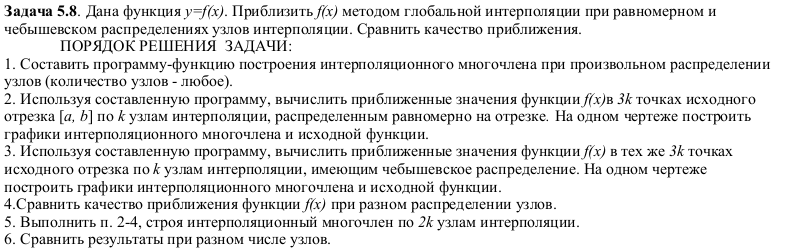

In [111]:
Image("/home/nikita/Изображения/5_task4.png")

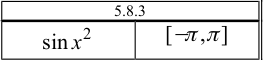

In [112]:
Image("/home/nikita/Изображения/5_task4_2.png")

In [113]:
def f(x):
    return np.sin(x**2)
a=-np.pi
b=np.pi
k=15

In [114]:
x_s=np.linspace(a,b,3*k)#тестовые 3k точек
y_s=f(x_s)
X_eq=np.linspace(a,b,k)#k точек с равномерным распределением
Y_eq=f(X_eq)
X_cheb=np.array([np.cos((2*i+1)/(2*k)*np.pi) for i in range(k)])*(b-a)*0.5+(b+a)*0.5#k точек с чебышевским распределением
Y_cheb=f(X_cheb)

Построим графики интерполяционного многочлена и исходной функции для равномерноно распределения узлов интерполяции. 

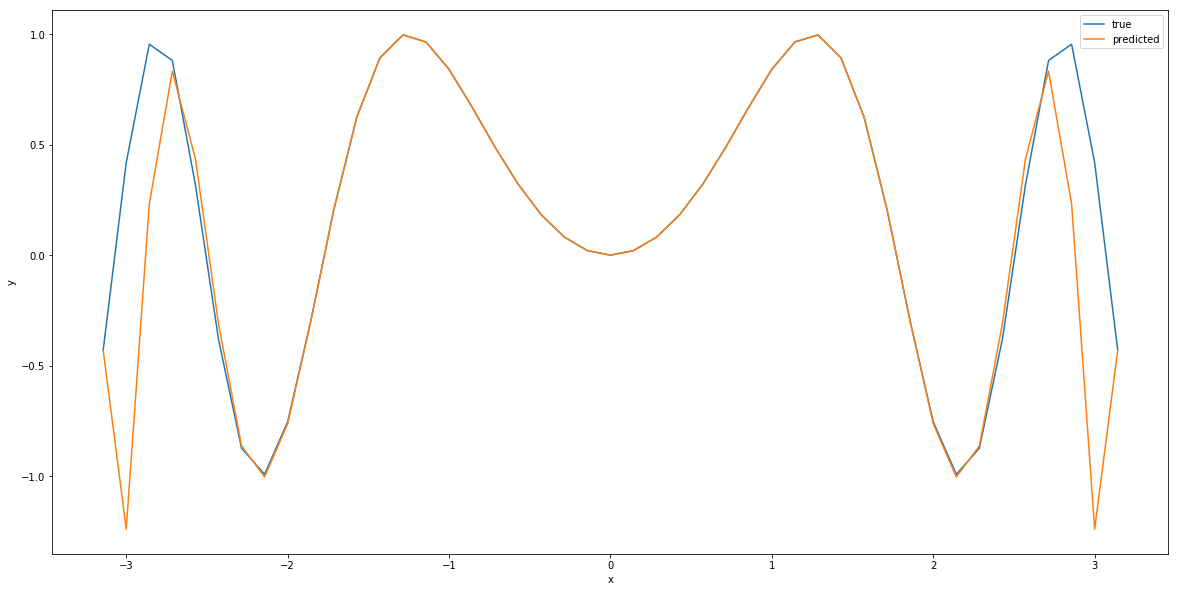

In [115]:
plt.figure(figsize=(20,10))
y_pred=[lagr_pol(x,X_eq,Y_eq) for x in x_s]
plt.plot(x_s,y_s,label='true')
plt.plot(x_s,y_pred,label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [116]:
print('Ошибка:',np.max(np.abs(y_s-y_pred)))

Ошибка: 1.6587660935270916


Построим графики интерполяционного многочлена и исходной функции для чебышевского распределения узлов интерполяции. 

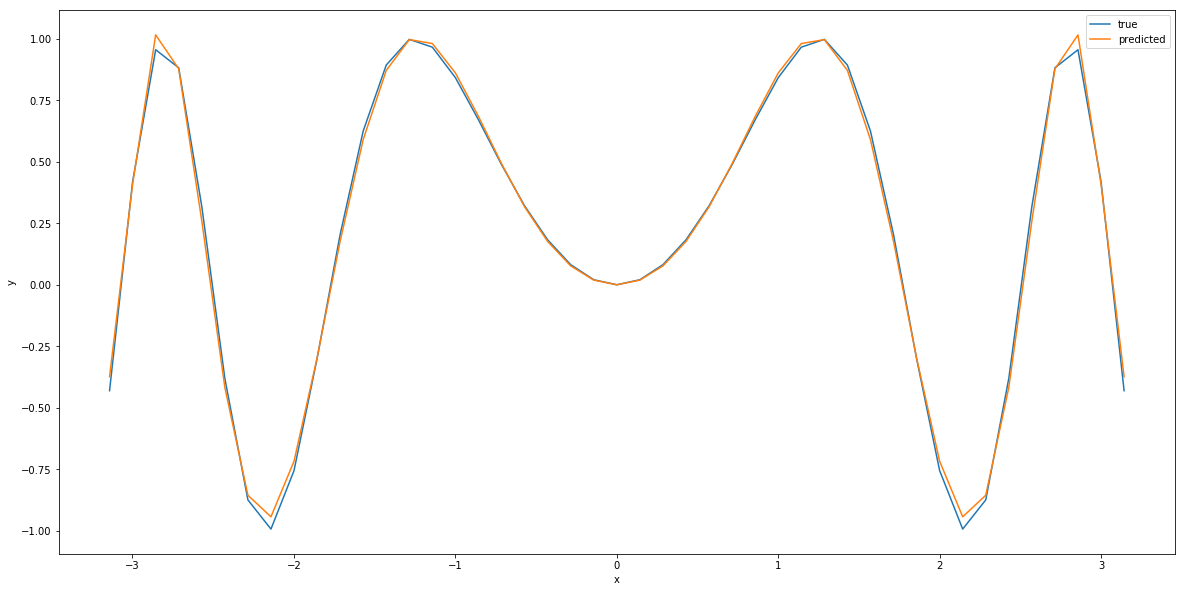

In [118]:
plt.figure(figsize=(20,10))
y_pred=[lagr_pol(x,X_cheb,Y_cheb) for x in x_s]
plt.plot(x_s,y_s,label='true')
plt.plot(x_s,y_pred,label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [120]:
print('Ошибка',np.max(np.abs(y_s-y_pred)))

Ошибка 0.060214898300780195


Во втором случае (с распределением Чебышева) ошибка меньше. 

In [122]:
X_eq=np.linspace(a,b,2*k)#2k точек с равномерным распределением
Y_eq=f(X_eq)
X_cheb=np.array([np.cos((2*i+1)/(4*k)*np.pi) for i in range(2*k)])*(b-a)*0.5+(b+a)*0.5#2k точек с чебышевским распределением
Y_cheb=f(X_cheb)

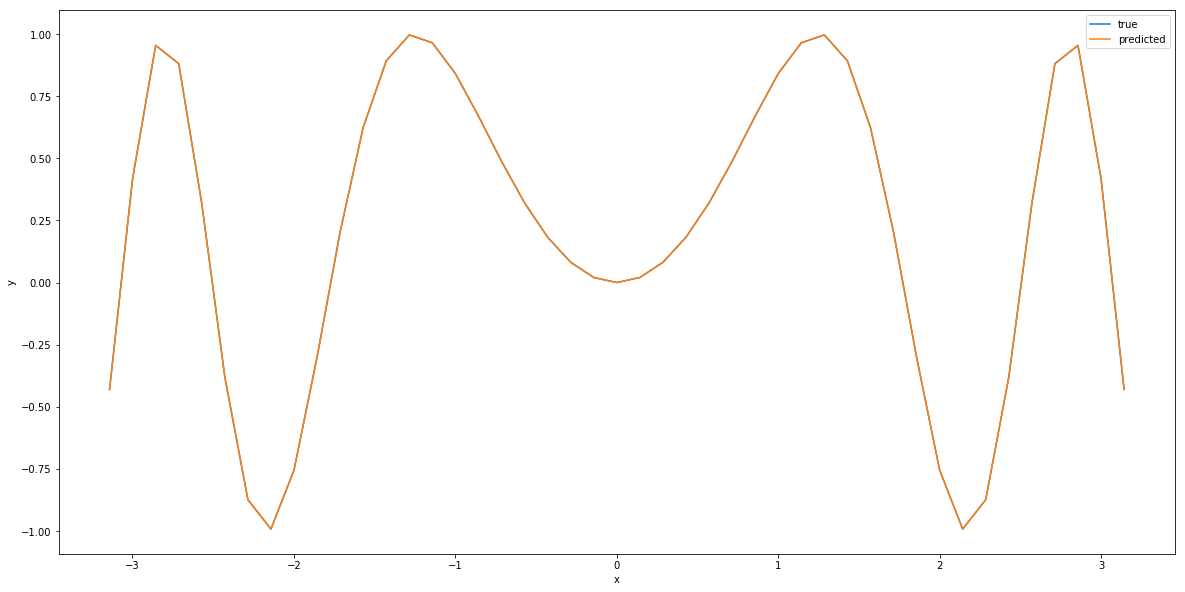

In [123]:
plt.figure(figsize=(20,10))
y_pred=[lagr_pol(x,X_eq,Y_eq) for x in x_s]
plt.plot(x_s,y_s,label='true')
plt.plot(x_s,y_pred,label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [125]:
print('Ошибка:',np.max(np.abs(y_s-y_pred)))

Ошибка: 0.0012085190498659637


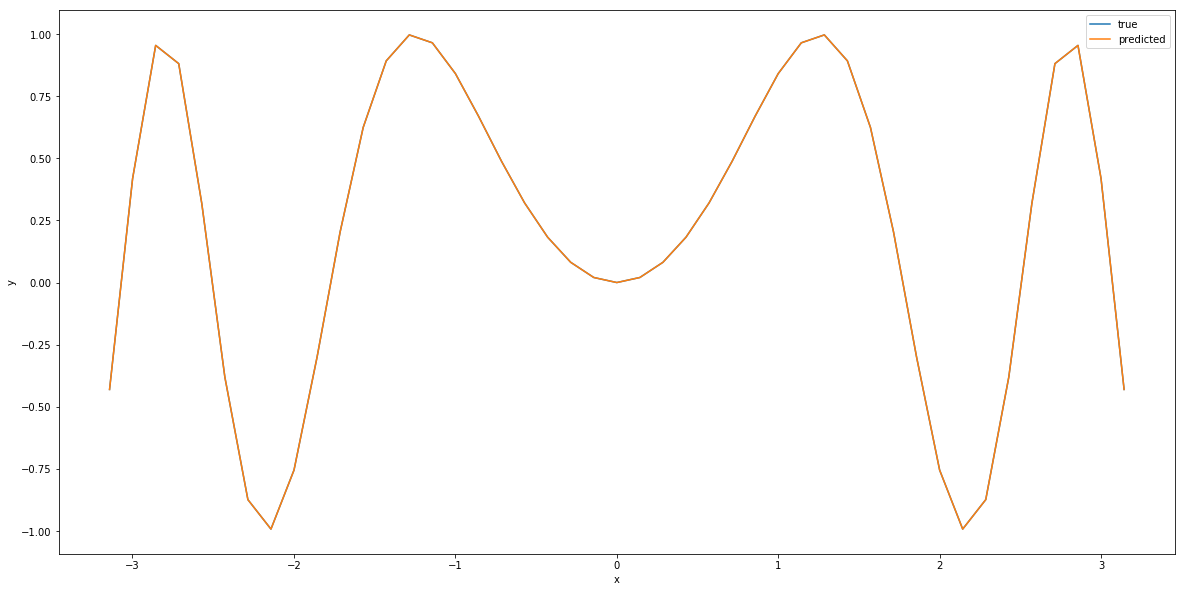

In [126]:
plt.figure(figsize=(20,10))
y_pred=[lagr_pol(x,X_cheb,Y_cheb) for x in x_s]
plt.plot(x_s,y_s,label='true')
plt.plot(x_s,y_pred,label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [127]:
print('Ошибка:',np.max(np.abs(y_s-y_pred)))

Ошибка: 4.0765136033460436e-07


Если удвоить количество узлов интерполяции, то ошибка уменьшится по сравнению с предыдущими случаями. В то же время, с количествоим узлов, равнм 2k, функция более качественно приближается при чебышевском распределении узлов, чем при равномерном.